### 1. Carga de datos e importación de librerías

In [2]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd()))

from Cargar_datos import cargar_datos

df = cargar_datos()
df.head()


,tipo_credito,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,tipo_laboral,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,...,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,tendencia_ingresos,Pago_atiempo
0,7,2024-12-21 11:31:35,3692160.0,10,42,Independiente,8000000,2500000,341296,88.768094,...,0.0,51258.0,51258.0,0.0,5,0,0,908526.0,Estable,1
1,4,2025-04-22 09:47:35,840000.0,6,60,Empleado,3000000,2000000,124876,95.227787,...,0.0,8673.0,8673.0,0.0,0,0,2,939017.0,Creciente,1
2,9,2026-01-08 12:22:40,5974028.4,10,36,Independiente,4036000,829000,529554,47.613894,...,0.0,18702.0,18702.0,0.0,3,0,0,NaN,NaN,0
3,4,2025-08-04 12:04:10,1671240.0,6,48,Empleado,1524547,498000,252420,95.227787,...,0.0,15782.0,15782.0,0.0,3,0,0,1536193.0,Creciente,1
4,9,2025-04-26 11:24:26,2781636.0,11,44,Empleado,5000000,4000000,217037,95.227787,...,0.0,204804.0,204804.0,0.0,3,0,1,933473.0,Creciente,1


In [3]:
# ==============================
# Librerías base
# ==============================
import pandas as pd
import numpy as np

# ==============================
# Visualización
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================
# Configuración visual
# ==============================
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# ==============================
# Opciones pandas
# ==============================
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: f"{x:,.2f}")


### 2. Exploración de datos

In [ ]:
def exploracion_inicial(df: pd.DataFrame):
    print("🔹 Dimensión del dataset:")
    display(df.shape)
    
    print("\n🔹 Información general:")
    display(df.info())
    
    print("\n🔹 Valores nulos por columna:")
    display(df.isnull().sum())


exploracion_inicial(df)


🔹 Dimensión del dataset:


(10763, 23)


🔹 Información general:
<class 'pandas.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  int64         
 1   fecha_prestamo                 10763 non-null  datetime64[us]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  str           
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  ca

None


🔹 Valores nulos por columna:


tipo_credito                        0
fecha_prestamo                      0
capital_prestado                    0
plazo_meses                         0
edad_cliente                        0
tipo_laboral                        0
salario_cliente                     0
total_otros_prestamos               0
cuota_pactada                       0
puntaje                             0
puntaje_datacredito                 6
cant_creditosvigentes               0
huella_consulta                     0
saldo_mora                        156
saldo_total                       156
saldo_principal                   405
saldo_mora_codeudor               590
creditos_sectorFinanciero           0
creditos_sectorCooperativo          0
creditos_sectorReal                 0
promedio_ingresos_datacredito    2930
tendencia_ingresos               2932
Pago_atiempo                        0
dtype: int64

Variables con más proporción de nulos (30%): 

- promedio_ingresos_datacredito    
- tendencia_ingresos               


#### Tipos de variables: 

A continuación, se presenta la caracterización de las variables del dataset según su naturaleza estadística y su interpretación desde el negocio crediticio. Esta clasificación permite definir estrategias adecuadas de análisis exploratorio, transformación y modelado en las siguientes etapas del proyecto.

---

##### 🔹 Variable objetivo

- **Pago_atiempo**  
  Variable binaria que indica si el cliente cumple o no con el pago del crédito en los tiempos establecidos.  
  - Tipo: Categórica binaria  
  - Valores: 1 = paga a tiempo, 0 = no paga a tiempo

---

##### 🔹 Variables categóricas

###### Categóricas ordinales (politómicas)

- **tendencia_ingresos**  
  Representa la evolución de los ingresos del cliente en el tiempo.  
  - Categorías: Decreciente < Estable < Creciente  
  - El orden de las categorías es relevante y aporta información para la predicción del comportamiento de pago del cliente.  
  - Tipo: Categórica ordinal politómica

---

###### Categóricas nominales (politómicas)

- **tipo_credito**  
  Identifica el tipo de producto crediticio otorgado al cliente.  
  - Los valores corresponden a códigos de tipo de crédito sin un orden natural explícito. No tenemos metadata para conocet qué significa cada uno. 
  - Tipo: Categórica nominal politómica

---

###### Categóricas nominales (dicotómicas)

- **tipo_laboral**  
  Describe la condición laboral del cliente.  
  - Categorías: Empleado / Independiente  
  - Tipo: Categórica nominal dicotómica

---

##### 🔹 Variables temporales

- **fecha_prestamo**  
  Fecha y hora en la que se otorgó el crédito.  
  - Tipo: Variable temporal (datetime)  
  - Puede utilizarse para análisis de estacionalidad o para derivar variables adicionales como año, mes o día de la semana.

---

##### 🔹 Variables numéricas

###### Numéricas continuas

Variables que representan magnitudes monetarias o puntajes, donde el valor puede tomar cualquier número real dentro de un rango.

- capital_prestado  
- salario_cliente  
- total_otros_prestamos  
- cuota_pactada  
- puntaje  
- puntaje_datacredito  
- saldo_mora  
- saldo_total  
- saldo_principal  
- promedio_ingresos_datacredito  

> Nota: aunque algunas de estas variables se almacenen como enteros, conceptualmente representan valores continuos (por ejemplo, montos monetarios), por lo que se tratan como variables continuas durante el análisis exploratorio y el modelado.

---

###### Numéricas discretas

Variables que representan conteos o cantidades enteras.

- plazo_meses  
- edad_cliente  
- cant_creditosvigentes  
- huella_consulta  
- creditos_sectorFinanciero  
- creditos_sectorCooperativo  
- creditos_sectorReal  

---


- La correcta clasificación de las variables es fundamental para aplicar técnicas adecuadas de limpieza, transformación y codificación de datos.
- Las variables categóricas ordinales deben preservar su orden natural durante el proceso de encoding.
- Las variables monetarias presentan potencial asimetría y presencia de valores atípicos, lo cual deberá ser evaluado durante el análisis exploratorio.



##### Eliminación de variables

Si bien se podría calcular el plazo_meses dividiendo el capital prestado/cuota pactada, se observa que no se obtienen los mismos números, por lo que dejamos todas las variables. 

#### Tratamiento de valores nulos

In [11]:

def unificar_nulos(df: pd.DataFrame) -> pd.DataFrame:
    """
    Unifica distintas representaciones de nulos.
    """
    df = df.replace(["", "NULL", "null", "NaN", "nan"], np.nan)
    return df


df = unificar_nulos(df)



##### Conversión de tipo de datos


In [12]:
def convertir_tipos(df: pd.DataFrame) -> pd.DataFrame:
    """
    Conversión de tipos de datos según semántica de negocio.
    """
    # Fecha
    df["fecha_prestamo"] = pd.to_datetime(df["fecha_prestamo"], errors="coerce", dayfirst=True)
    
    # Variables numéricas con coma decimal
    columnas_coma = ["puntaje"]
    for col in columnas_coma:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(",", ".", regex=False)
            .astype(float)
        )
    
    # Categóricas
    categoricas = [
        "tipo_credito",
        "tipo_laboral",
    ]
    df[categoricas] = df[categoricas].astype("category")
    
    # Variable objetivo
    df["Pago_atiempo"] = df["Pago_atiempo"].astype("int")
    
    return df


df = convertir_tipos(df)
df.info()



<class 'pandas.DataFrame'>
RangeIndex: 10763 entries, 0 to 10762
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   tipo_credito                   10763 non-null  category      
 1   fecha_prestamo                 10763 non-null  datetime64[us]
 2   capital_prestado               10763 non-null  float64       
 3   plazo_meses                    10763 non-null  int64         
 4   edad_cliente                   10763 non-null  int64         
 5   tipo_laboral                   10763 non-null  category      
 6   salario_cliente                10763 non-null  int64         
 7   total_otros_prestamos          10763 non-null  int64         
 8   cuota_pactada                  10763 non-null  int64         
 9   puntaje                        10763 non-null  float64       
 10  puntaje_datacredito            10757 non-null  float64       
 11  cant_creditosvigentes     

### EDA


In [18]:

df.describe()

,fecha_prestamo,capital_prestado,plazo_meses,edad_cliente,salario_cliente,total_otros_prestamos,cuota_pactada,puntaje,puntaje_datacredito,cant_creditosvigentes,huella_consulta,saldo_mora,saldo_total,saldo_principal,saldo_mora_codeudor,creditos_sectorFinanciero,creditos_sectorCooperativo,creditos_sectorReal,promedio_ingresos_datacredito,Pago_atiempo
count,10763,"10,763.00","10,763.00","10,763.00","10,763.00","10,763.00","10,763.00","10,763.00","10,757.00","10,763.00","10,763.00","10,607.00","10,607.00","10,358.00","10,173.00","10,763.00","10,763.00","10,763.00","7,833.00","10,763.00"
mean,2025-04-16 23:06:02.111121,"2,434,315.00",10.58,43.95,"17,216,431.46","6,238,869.65","243,617.41",91.17,780.79,5.73,4.23,7.75,"45,937.41","40,346.17",0.26,2.78,0.27,1.30,"2,005,156.81",0.95
min,2024-11-26 09:17:04,"360,000.00",2.00,19.00,0.00,0.00,"23,944.00",-38.01,-7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2025-01-20 17:33:07.500000,"1,224,831.00",6.00,33.00,"2,000,000.00","500,000.00","121,041.50",95.23,757.00,3.00,2.00,0.00,"2,898.00","2,690.00",0.00,1.00,0.00,0.00,"925,157.00",1.00
50%,2025-03-27 16:23:12,"1,921,920.00",10.00,42.00,"3,000,000.00","1,000,000.00","182,863.00",95.23,791.00,5.00,4.00,0.00,"16,178.00","14,442.50",0.00,2.00,0.00,1.00,"1,204,496.00",1.00
75%,2025-06-16 13:27:58,"3,084,840.00",12.00,53.00,"4,875,808.00","2,000,000.00","287,833.50",95.23,825.00,8.00,6.00,0.00,"52,982.00","47,632.25",0.00,4.00,0.00,2.00,"2,231,859.00",1.00
max,2026-04-26 18:43:52,"41,444,152.80",90.00,123.00,"22,000,000,000.00","6,787,675,263.00","3,816,752.00",95.23,999.00,62.00,29.00,"12,534.00","5,116,066.00","1,562,285.00","2,145.00",51.00,13.00,25.00,"38,106,581.00",1.00
std,NaN,"1,909,642.76",6.63,15.06,"355,476,717.60","118,418,316.94","210,493.69",16.47,104.88,3.98,3.06,225.96,"106,269.79","71,242.44",21.77,2.75,0.72,1.82,"2,144,116.15",0.21


##### Análisis univariado


📊 Variable: capital_prestado


count       10,763.00
mean     2,434,315.00
std      1,909,642.76
min        360,000.00
25%      1,224,831.00
50%      1,921,920.00
75%      3,084,840.00
max     41,444,152.80
Name: capital_prestado, dtype: float64

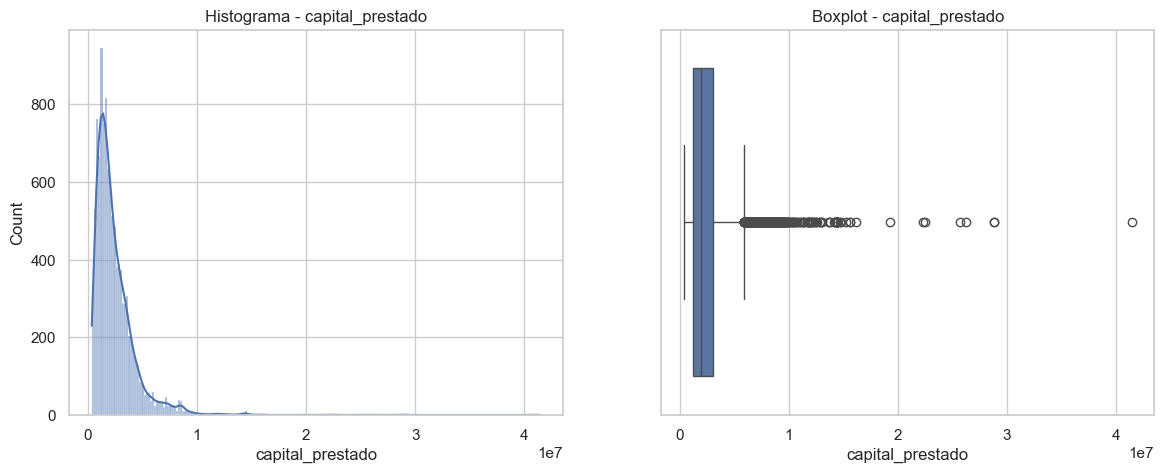

Skewness: 3.72
Kurtosis: 35.32

📊 Variable: plazo_meses


count   10,763.00
mean        10.58
std          6.63
min          2.00
25%          6.00
50%         10.00
75%         12.00
max         90.00
Name: plazo_meses, dtype: float64

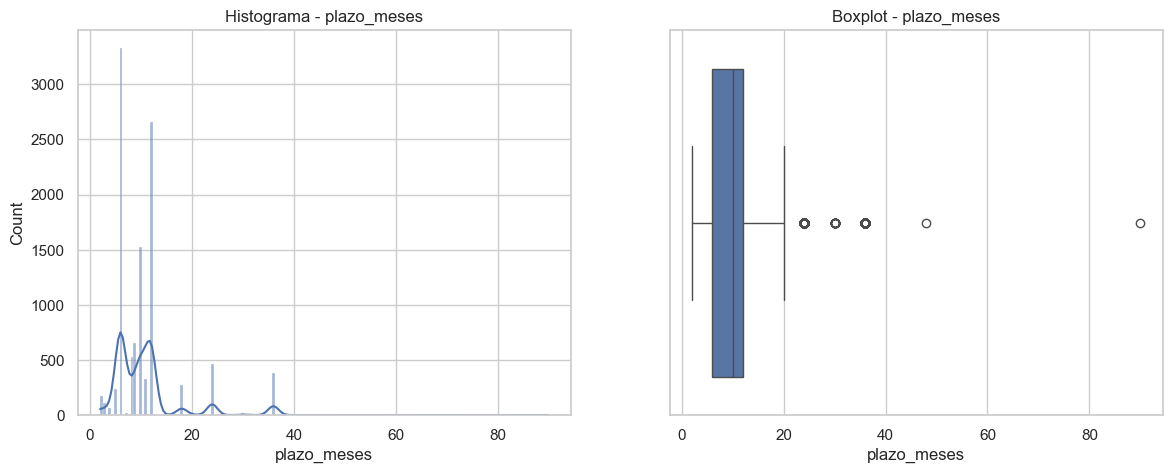

Skewness: 2.46
Kurtosis: 7.78

📊 Variable: edad_cliente


count   10,763.00
mean        43.95
std         15.06
min         19.00
25%         33.00
50%         42.00
75%         53.00
max        123.00
Name: edad_cliente, dtype: float64

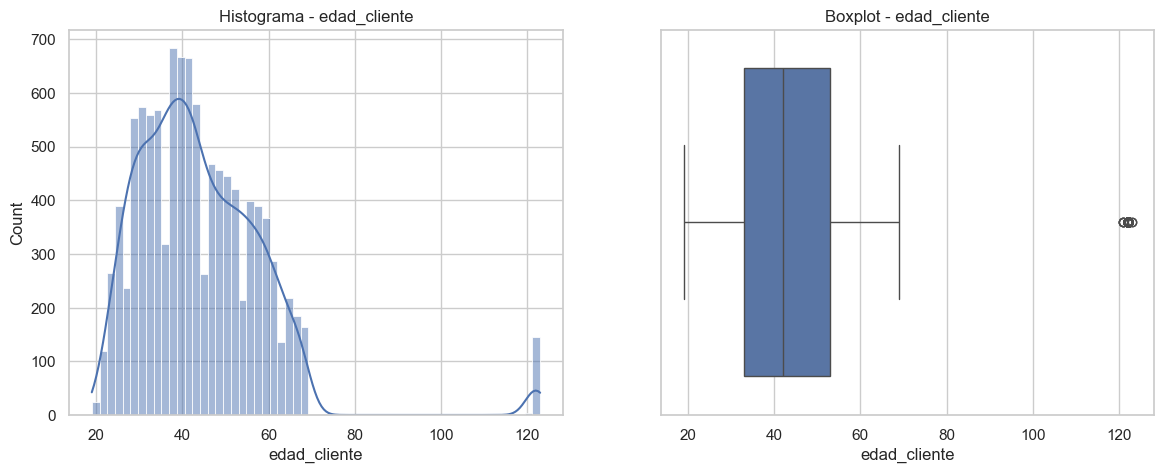

Skewness: 1.93
Kurtosis: 7.87

📊 Variable: salario_cliente


count           10,763.00
mean        17,216,431.46
std        355,476,717.60
min                  0.00
25%          2,000,000.00
50%          3,000,000.00
75%          4,875,808.00
max     22,000,000,000.00
Name: salario_cliente, dtype: float64

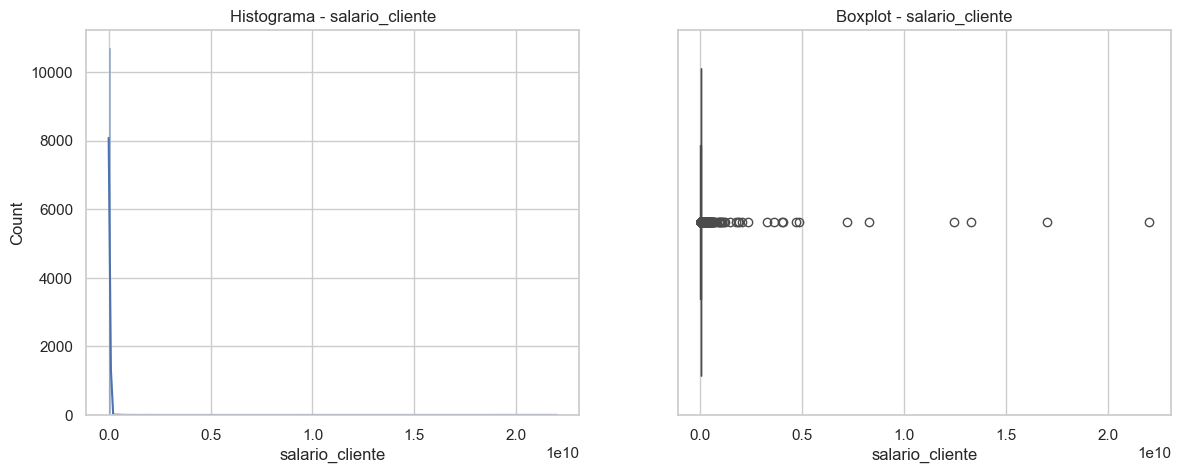

Skewness: 43.78
Kurtosis: 2211.23

📊 Variable: total_otros_prestamos


count          10,763.00
mean        6,238,869.65
std       118,418,316.94
min                 0.00
25%           500,000.00
50%         1,000,000.00
75%         2,000,000.00
max     6,787,675,263.00
Name: total_otros_prestamos, dtype: float64

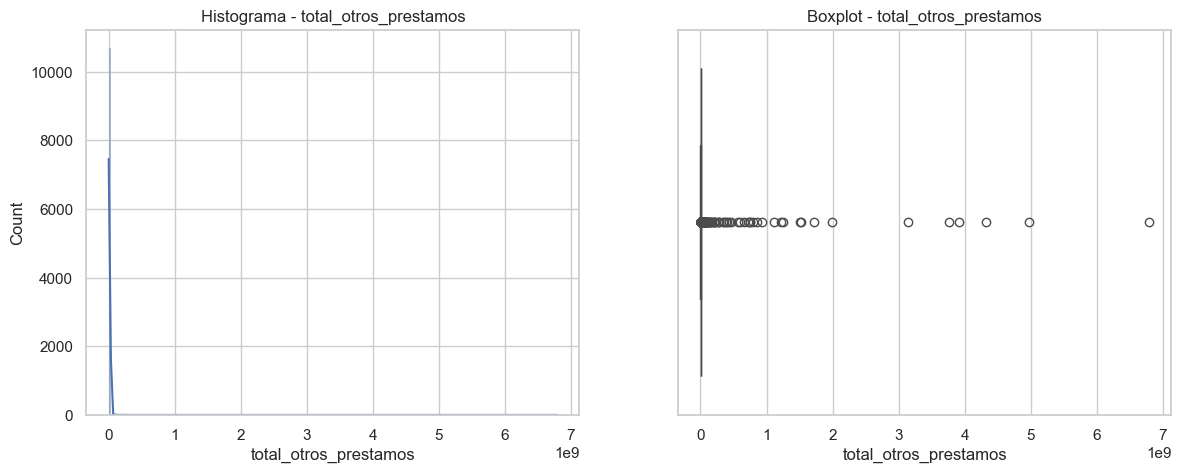

Skewness: 38.46
Kurtosis: 1719.28

📊 Variable: cuota_pactada


count      10,763.00
mean      243,617.41
std       210,493.69
min        23,944.00
25%       121,041.50
50%       182,863.00
75%       287,833.50
max     3,816,752.00
Name: cuota_pactada, dtype: float64

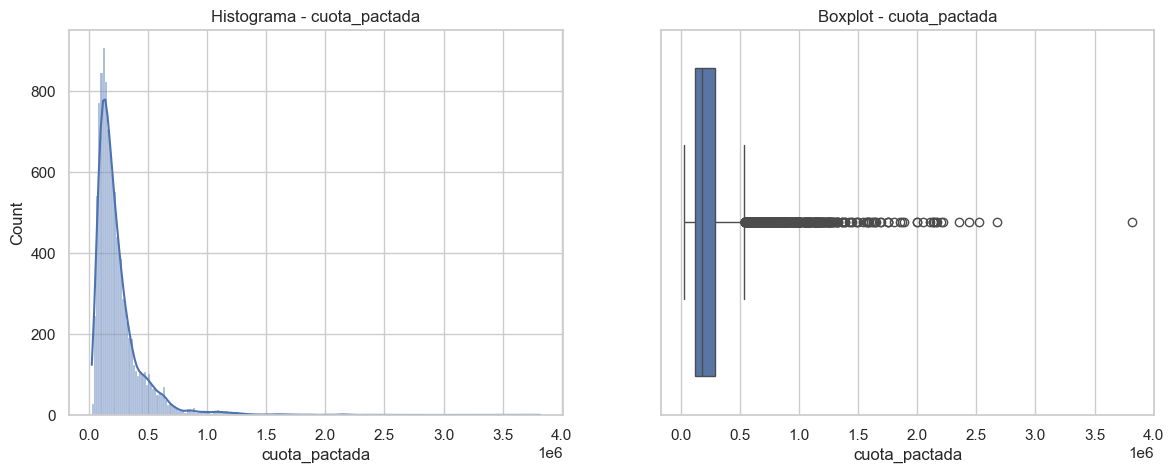

Skewness: 3.79
Kurtosis: 26.65

📊 Variable: puntaje


count   10,763.00
mean        91.17
std         16.47
min        -38.01
25%         95.23
50%         95.23
75%         95.23
max         95.23
Name: puntaje, dtype: float64

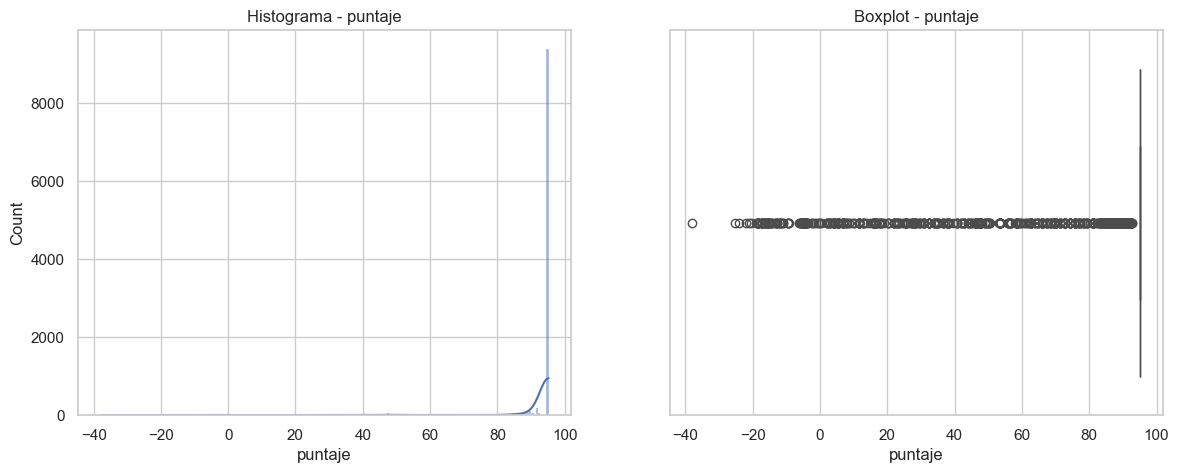

Skewness: -4.87
Kurtosis: 24.08

📊 Variable: puntaje_datacredito


count   10,757.00
mean       780.79
std        104.88
min         -7.00
25%        757.00
50%        791.00
75%        825.00
max        999.00
Name: puntaje_datacredito, dtype: float64

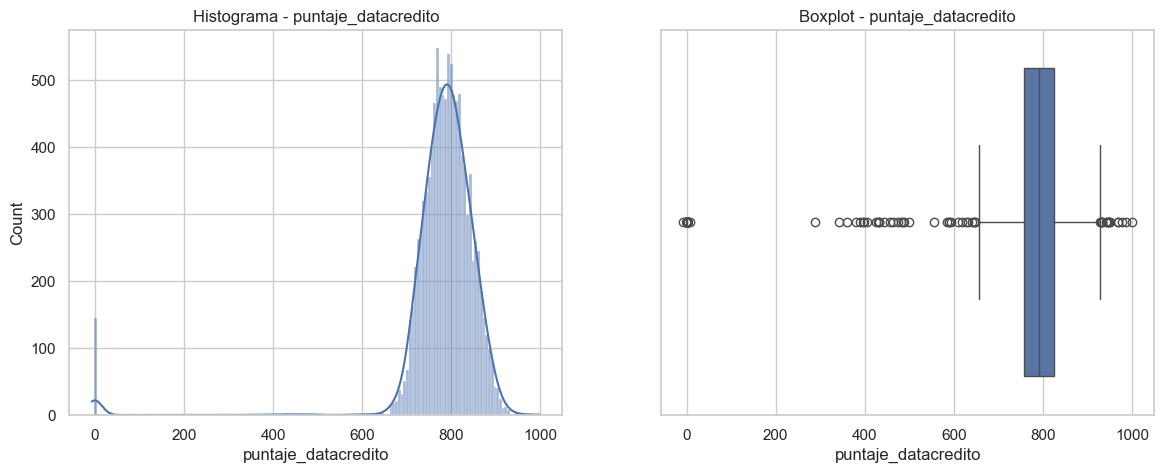

Skewness: -5.64
Kurtosis: 39.44

📊 Variable: cant_creditosvigentes


count   10,763.00
mean         5.73
std          3.98
min          0.00
25%          3.00
50%          5.00
75%          8.00
max         62.00
Name: cant_creditosvigentes, dtype: float64

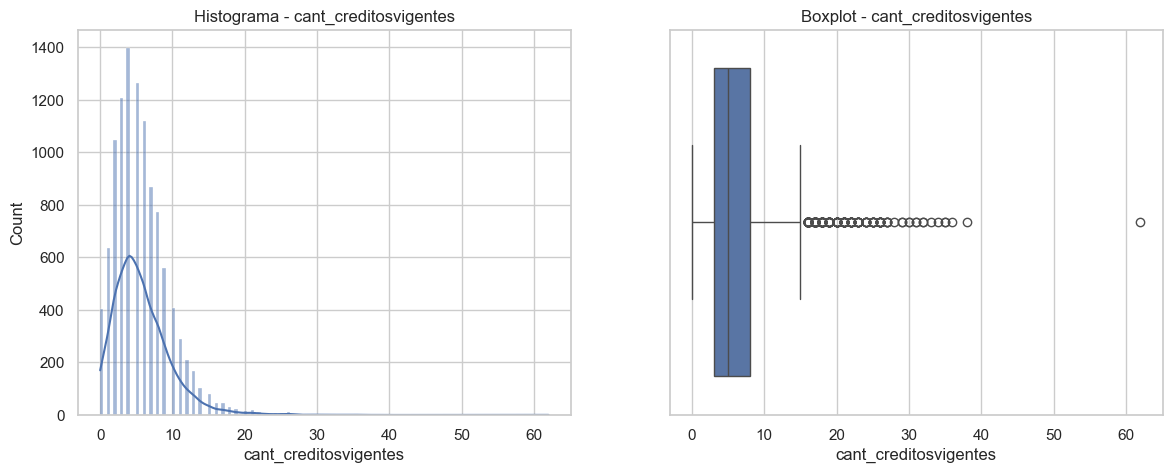

Skewness: 1.80
Kurtosis: 8.62

📊 Variable: huella_consulta


count   10,763.00
mean         4.23
std          3.06
min          0.00
25%          2.00
50%          4.00
75%          6.00
max         29.00
Name: huella_consulta, dtype: float64

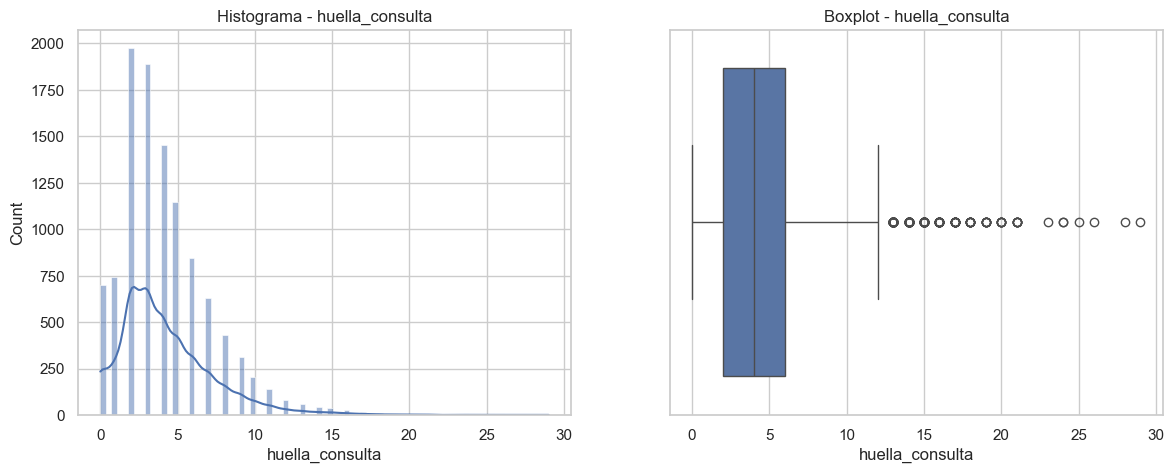

Skewness: 1.49
Kurtosis: 4.00

📊 Variable: saldo_mora


count   10,607.00
mean         7.75
std        225.96
min          0.00
25%          0.00
50%          0.00
75%          0.00
max     12,534.00
Name: saldo_mora, dtype: float64

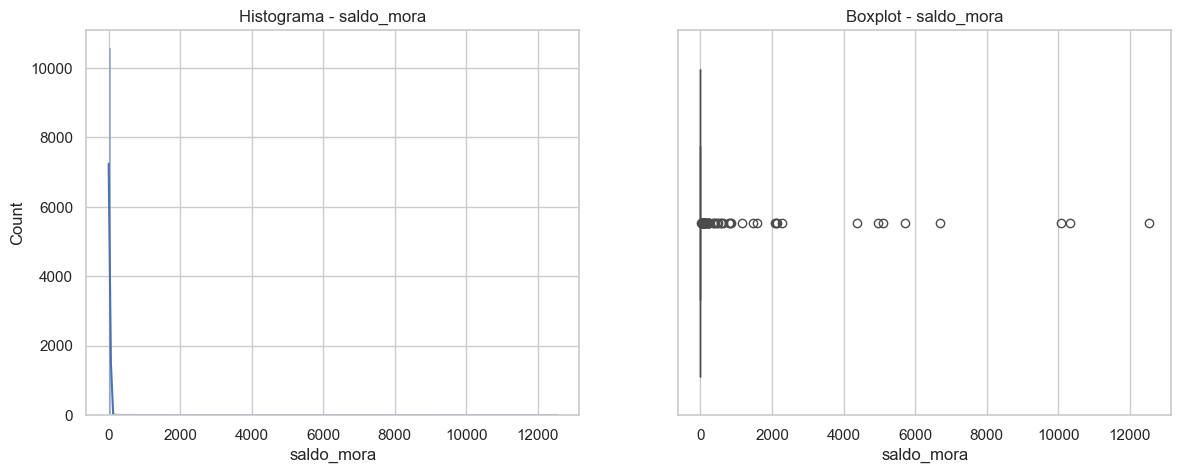

Skewness: 40.57
Kurtosis: 1845.71

📊 Variable: saldo_total


count      10,607.00
mean       45,937.41
std       106,269.79
min             0.00
25%         2,898.00
50%        16,178.00
75%        52,982.00
max     5,116,066.00
Name: saldo_total, dtype: float64

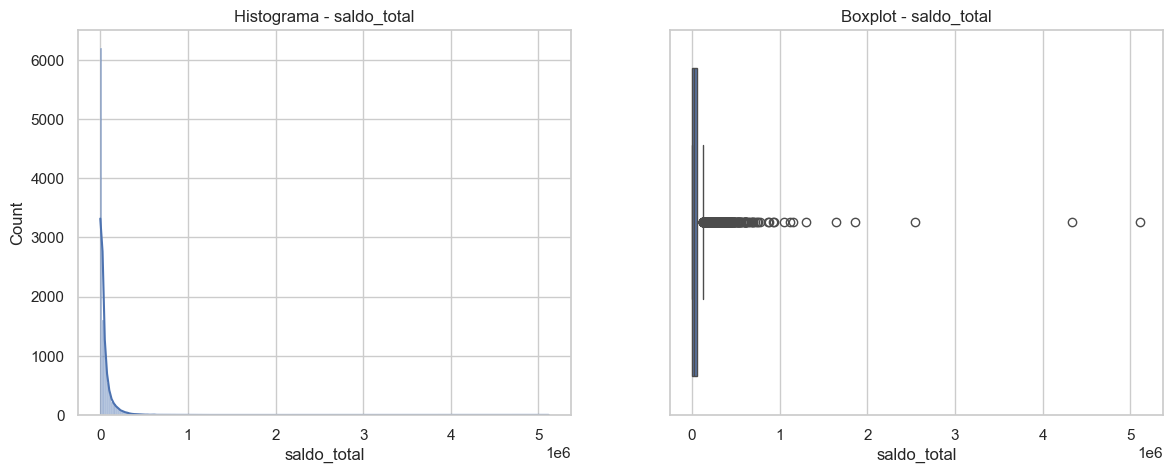

Skewness: 20.20
Kurtosis: 789.17

📊 Variable: saldo_principal


count      10,358.00
mean       40,346.17
std        71,242.44
min             0.00
25%         2,690.00
50%        14,442.50
75%        47,632.25
max     1,562,285.00
Name: saldo_principal, dtype: float64

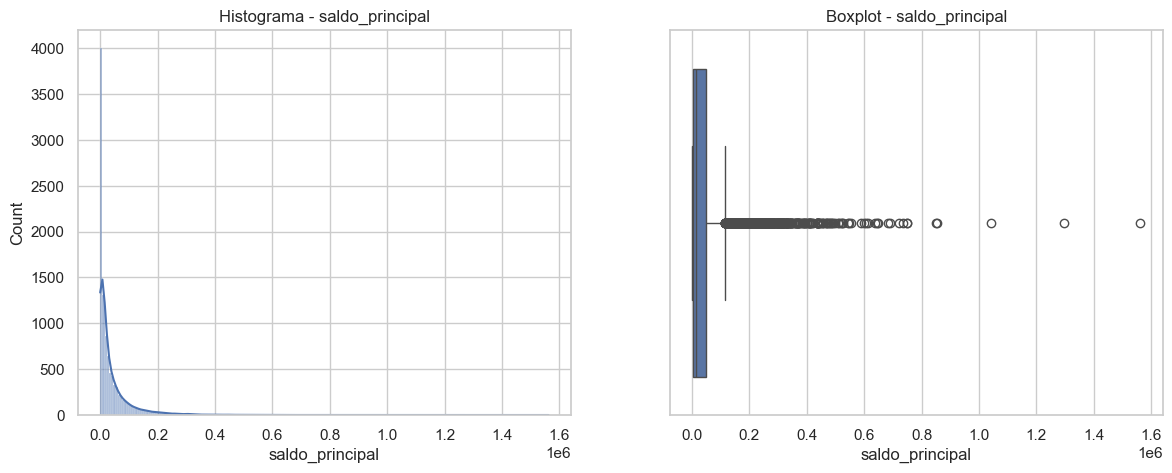

Skewness: 5.05
Kurtosis: 51.06

📊 Variable: saldo_mora_codeudor


count   10,173.00
mean         0.26
std         21.77
min          0.00
25%          0.00
50%          0.00
75%          0.00
max      2,145.00
Name: saldo_mora_codeudor, dtype: float64

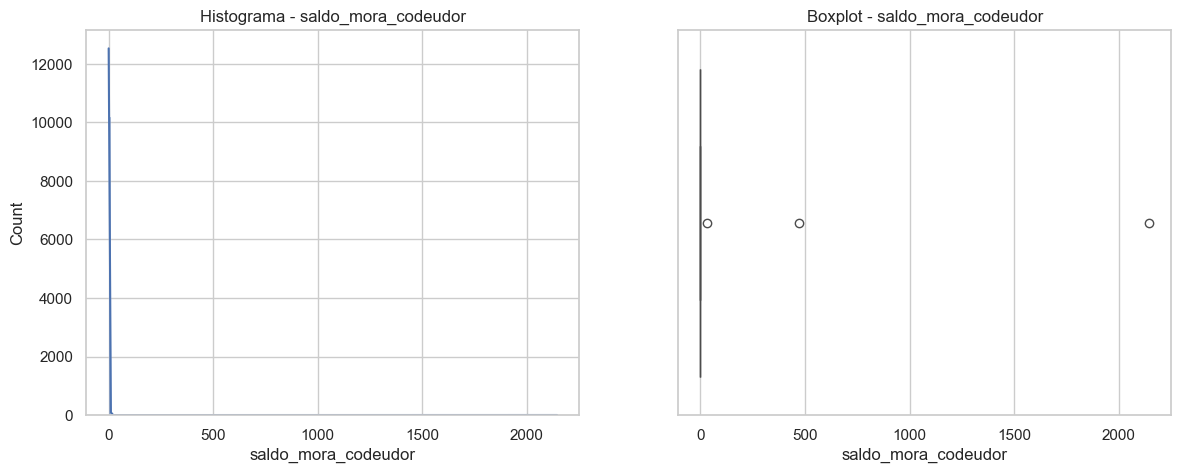

Skewness: 94.97
Kurtosis: 9279.82

📊 Variable: creditos_sectorFinanciero


count   10,763.00
mean         2.78
std          2.75
min          0.00
25%          1.00
50%          2.00
75%          4.00
max         51.00
Name: creditos_sectorFinanciero, dtype: float64

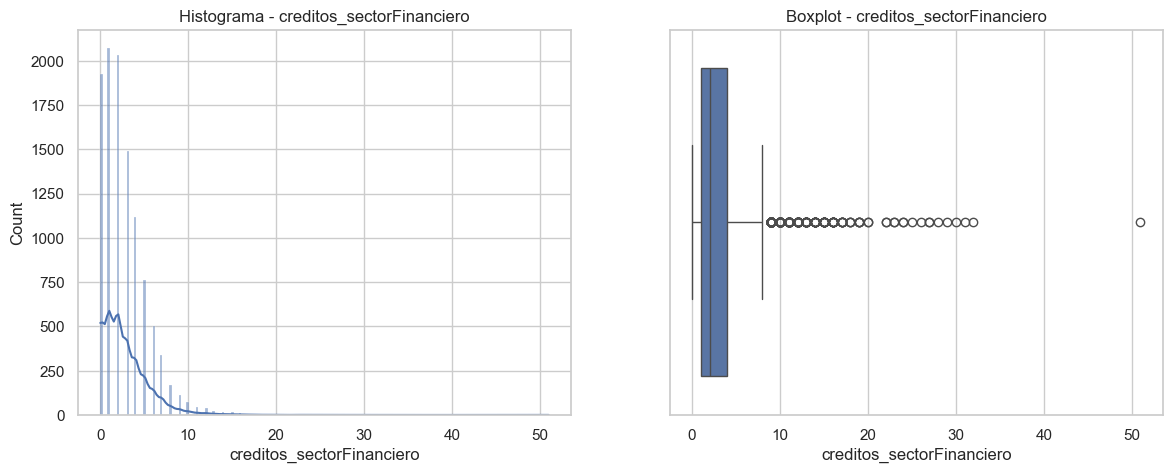

Skewness: 2.70
Kurtosis: 19.44

📊 Variable: creditos_sectorCooperativo


count   10,763.00
mean         0.27
std          0.72
min          0.00
25%          0.00
50%          0.00
75%          0.00
max         13.00
Name: creditos_sectorCooperativo, dtype: float64

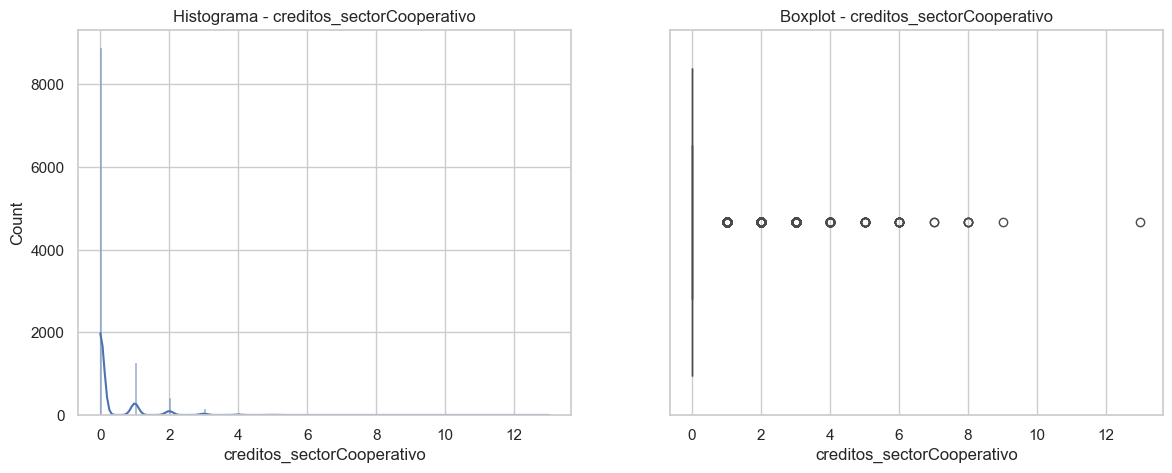

Skewness: 4.22
Kurtosis: 29.35

📊 Variable: creditos_sectorReal


count   10,763.00
mean         1.30
std          1.82
min          0.00
25%          0.00
50%          1.00
75%          2.00
max         25.00
Name: creditos_sectorReal, dtype: float64

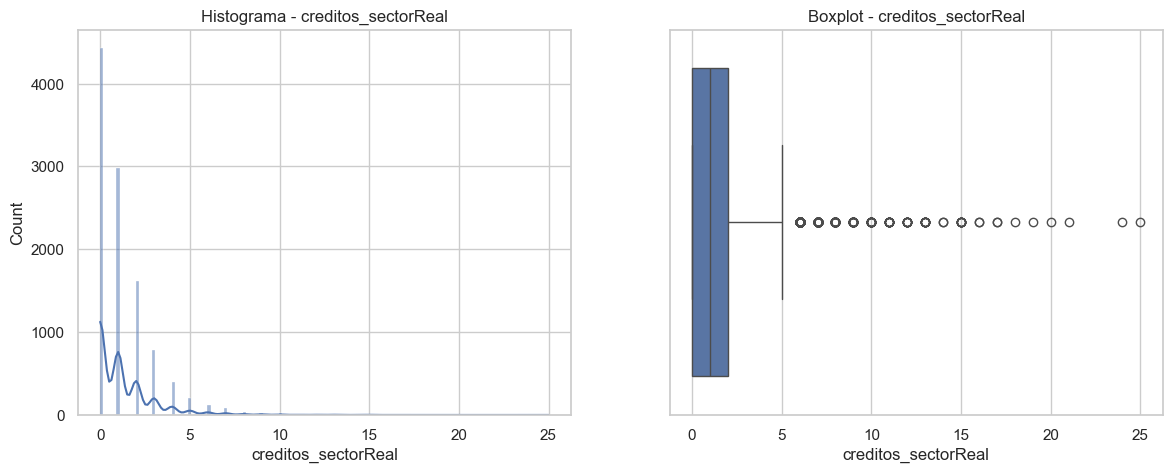

Skewness: 3.16
Kurtosis: 18.19

📊 Variable: promedio_ingresos_datacredito


count        7,833.00
mean     2,005,156.81
std      2,144,116.15
min              0.00
25%        925,157.00
50%      1,204,496.00
75%      2,231,859.00
max     38,106,581.00
Name: promedio_ingresos_datacredito, dtype: float64

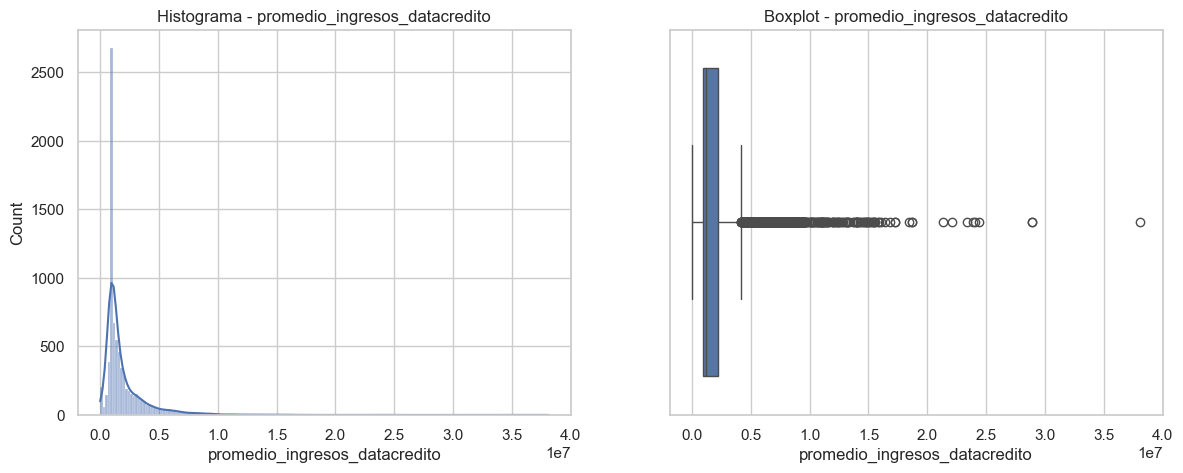

Skewness: 4.28
Kurtosis: 32.77

📊 Variable: tipo_credito


tipo_credito
4     7747
9     2876
10     116
6       21
7        2
68       1
Name: count, dtype: int64

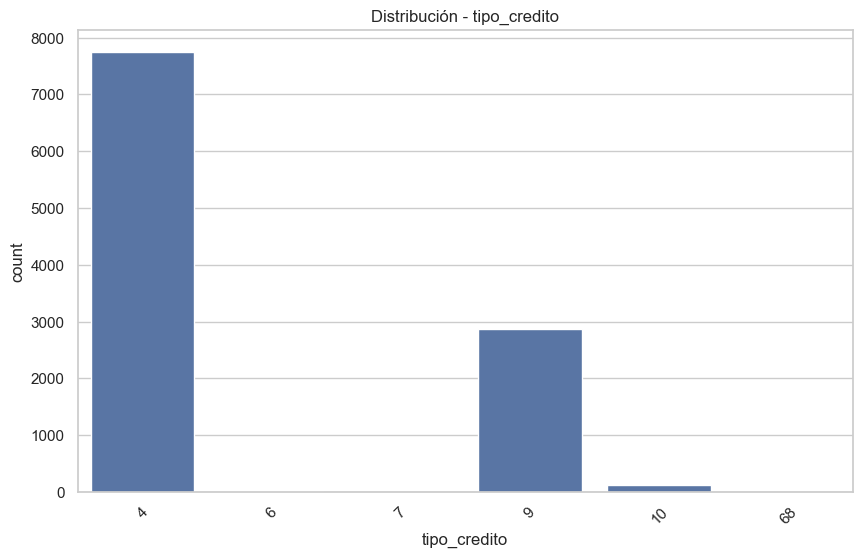


📊 Variable: tipo_laboral


tipo_laboral
Empleado         6754
Independiente    4009
Name: count, dtype: int64

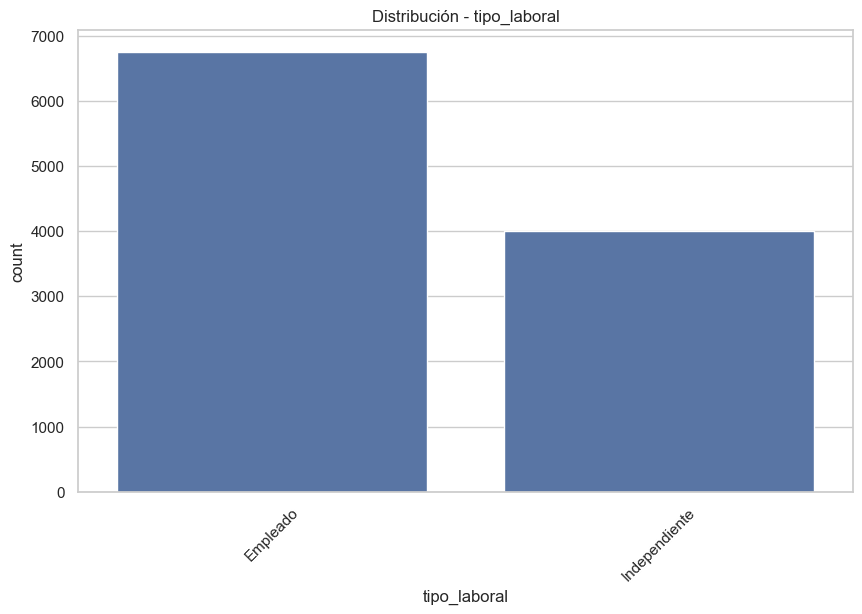


📊 Variable: tendencia_ingresos


tendencia_ingresos
Creciente      5294
Decreciente    1291
Estable        1188
0                 7
8315              6
1000000           4
9147              2
-702927           1
-566272           1
-435177           1
-224714           1
-164315           1
-101368           1
-70715            1
-28589            1
-4105             1
-288              1
3978              1
5697              1
9090              1
10808             1
15090             1
15245             1
17181             1
22363             1
22832             1
24702             1
31837             1
52862             1
54683             1
65988             1
75761             1
77975             1
82657             1
86286             1
122727            1
146918            1
158042            1
168750            1
173031            1
209090            1
417087            1
1123000           1
1817052           1
2029000           1
4250635           1
Name: count, dtype: int64

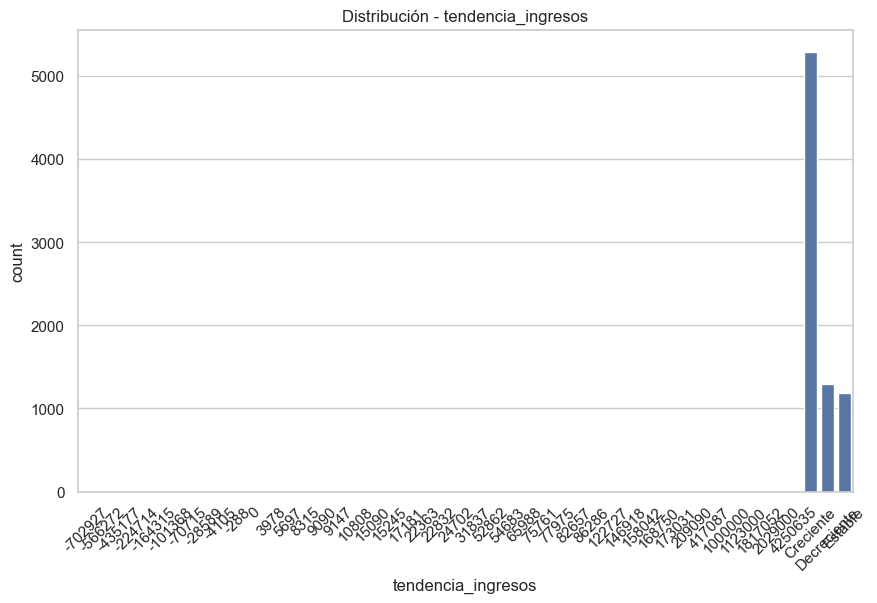

In [20]:
## ==============================
## Análisis univariable
## ==============================


def analisis_univariable_numerico(df: pd.DataFrame, columnas: list):
    for col in columnas:
        print(f"\n📊 Variable: {col}")
        
        display(df[col].describe())
        
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        sns.histplot(df[col], kde=True, ax=axes[0])
        axes[0].set_title(f"Histograma - {col}")
        
        sns.boxplot(x=df[col], ax=axes[1])
        axes[1].set_title(f"Boxplot - {col}")
        
        plt.show()
        
        print(f"Skewness: {df[col].skew():.2f}")
        print(f"Kurtosis: {df[col].kurtosis():.2f}")

numericas = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numericas.remove("Pago_atiempo")

analisis_univariable_numerico(df, numericas)


def analisis_univariable_categorico(df: pd.DataFrame, columnas: list):
    for col in columnas:
        print(f"\n📊 Variable: {col}")
        display(df[col].value_counts())
        
        sns.countplot(data=df, x=col)
        plt.title(f"Distribución - {col}")
        plt.xticks(rotation=45)
        plt.show()

categoricas = df.select_dtypes(include=["category", "object"]).columns.tolist()
analisis_univariable_categorico(df, categoricas)




##### Correccíon de errores en variables

In [21]:
# Definir categorías válidas
categorias_validas = ["Creciente", "Estable", "Decreciente"]

# Reemplazar valores erróneos por NaN
df["tendencia_ingresos"] = df["tendencia_ingresos"].where(
    df["tendencia_ingresos"].isin(categorias_validas),
    np.nan
)

# Verificación
df["tendencia_ingresos"].value_counts(dropna=False)


# Definir rango válido de edad
edad_min = 18
edad_max = 100

# Reemplazar valores fuera de rango por NaN
df["edad_cliente"] = df["edad_cliente"].where(
    df["edad_cliente"].between(edad_min, edad_max),
    np.nan
)

# Verificación
df["edad_cliente"].value_counts(dropna=False).sort_index()


edad_cliente
19.00      1
20.00     24
21.00     43
22.00     77
23.00    109
24.00    156
25.00    158
26.00    232
27.00    236
28.00    263
29.00    291
30.00    275
31.00    299
32.00    292
33.00    267
34.00    281
35.00    287
36.00    319
37.00    344
38.00    339
39.00    321
40.00    346
41.00    332
42.00    333
43.00    327
44.00    253
45.00    262
46.00    246
47.00    221
48.00    242
49.00    215
50.00    207
51.00    239
52.00    204
53.00    216
54.00    214
55.00    212
56.00    187
57.00    205
58.00    185
59.00    187
60.00    179
61.00    150
62.00    136
63.00    135
64.00    117
65.00    101
66.00     90
67.00     94
68.00    109
69.00     55
NaN      150
Name: count, dtype: int64

##### Análisis bivariado


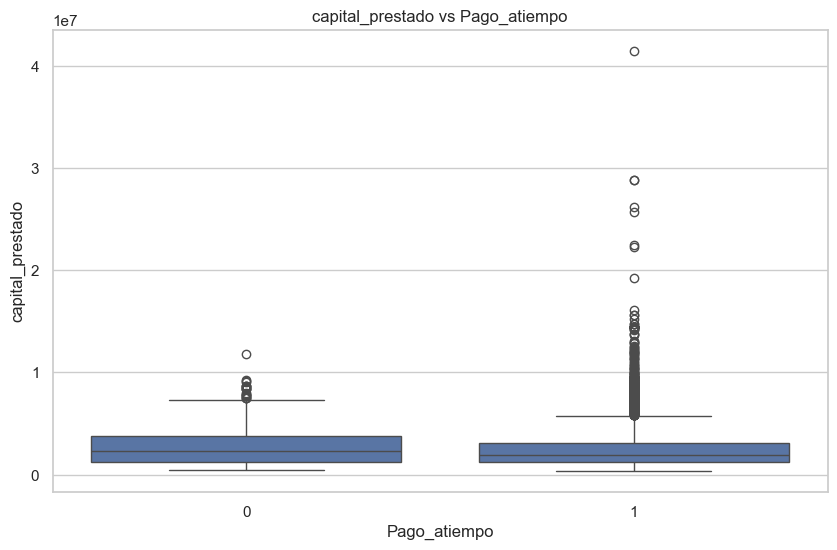

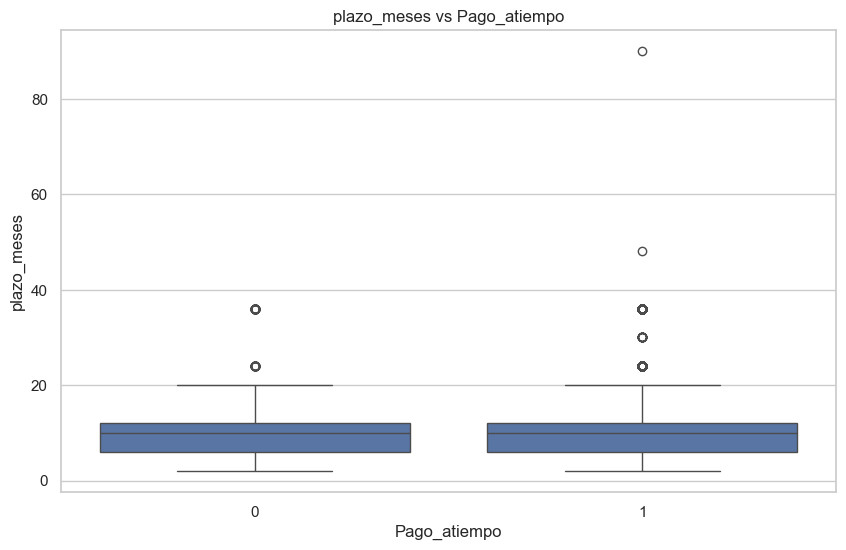

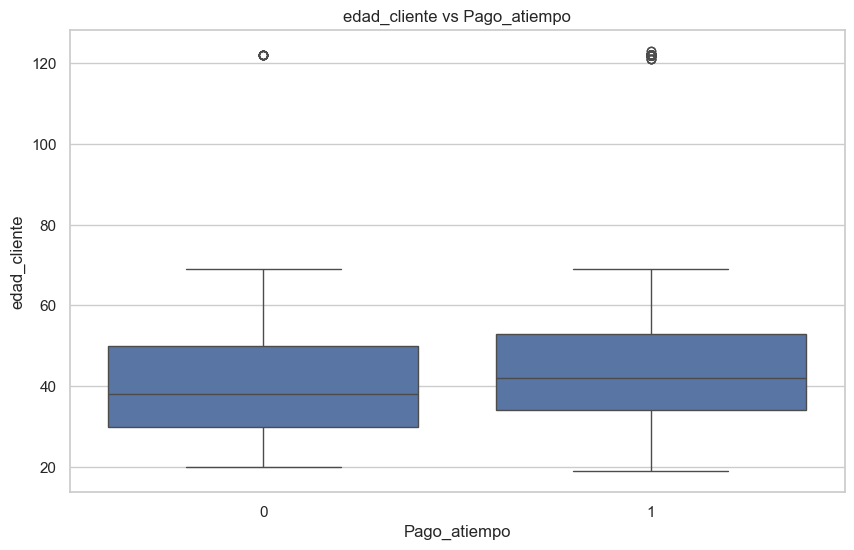

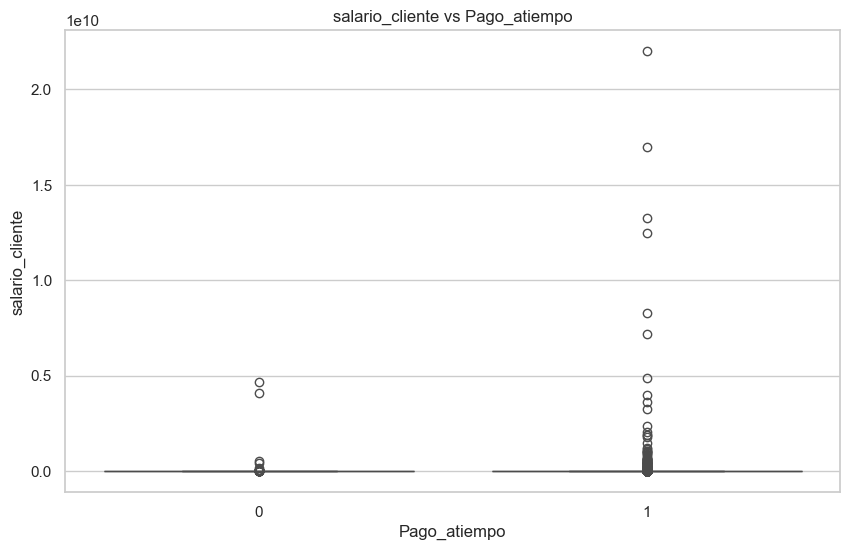

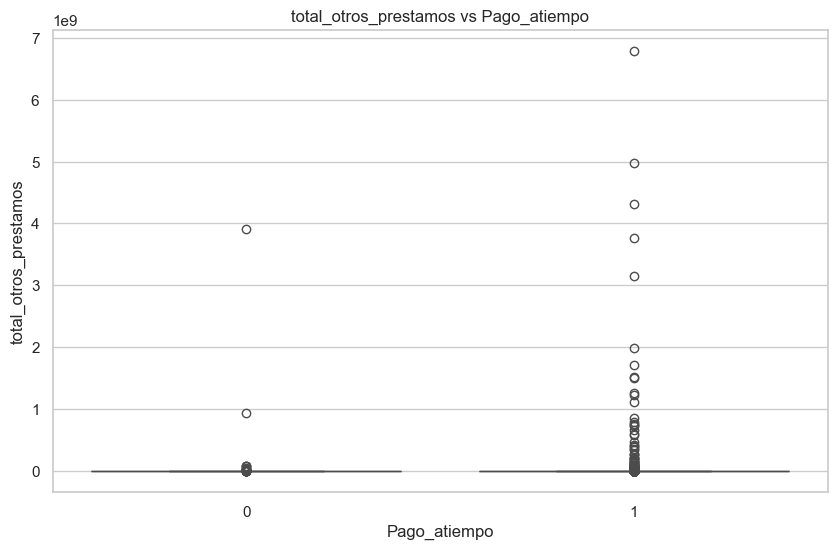

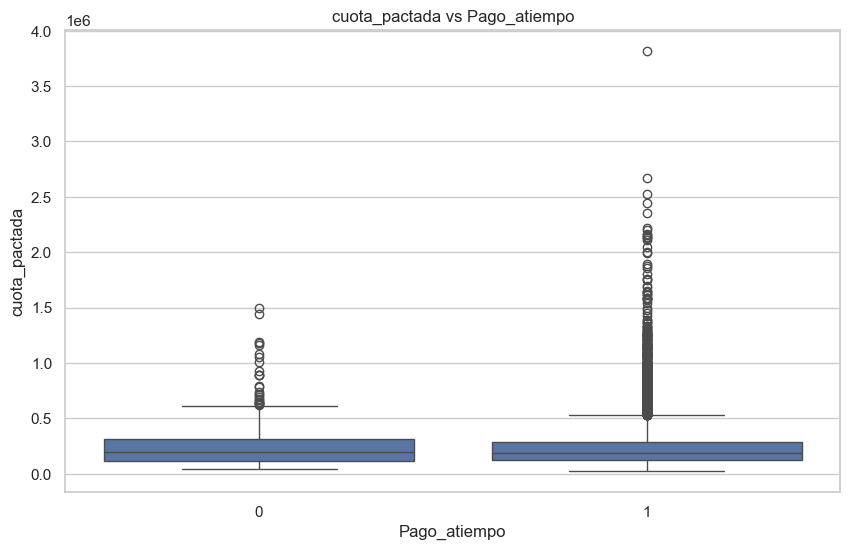

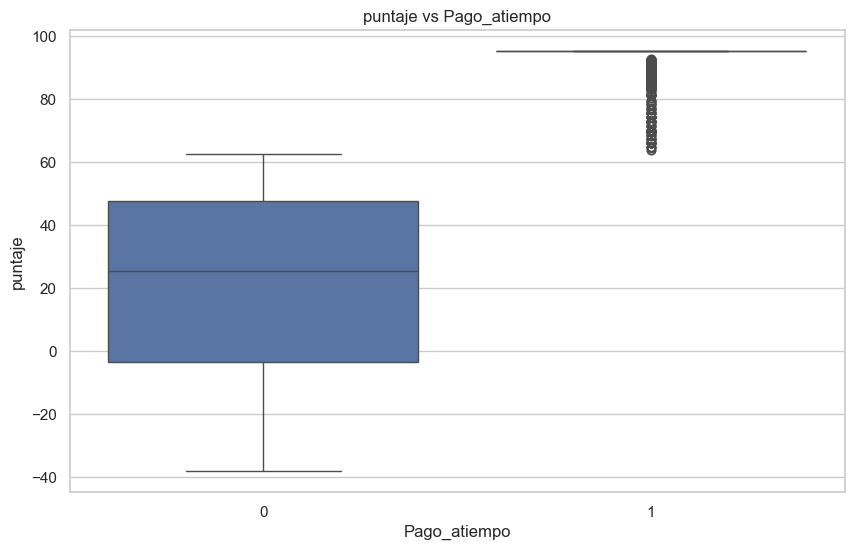

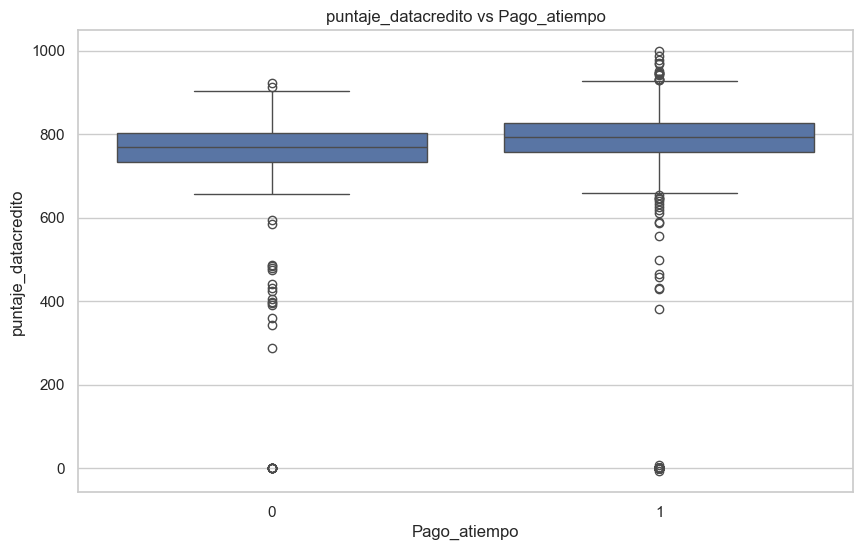

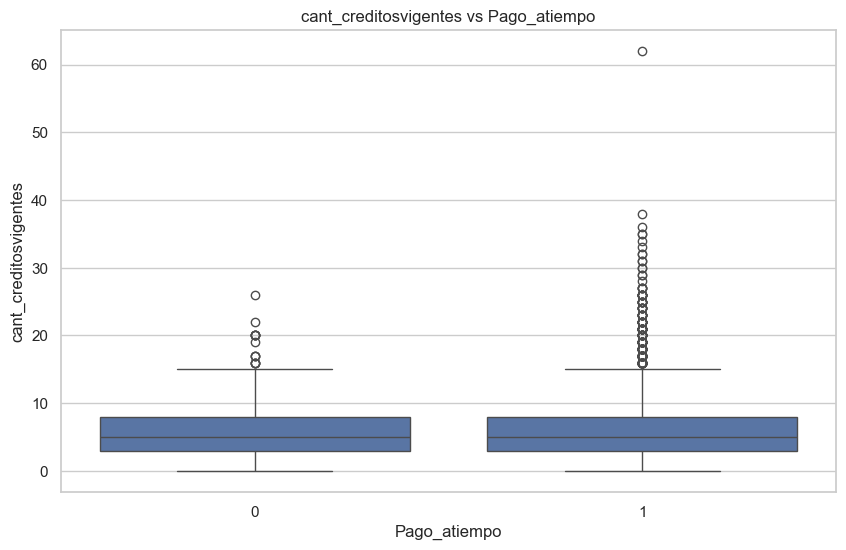

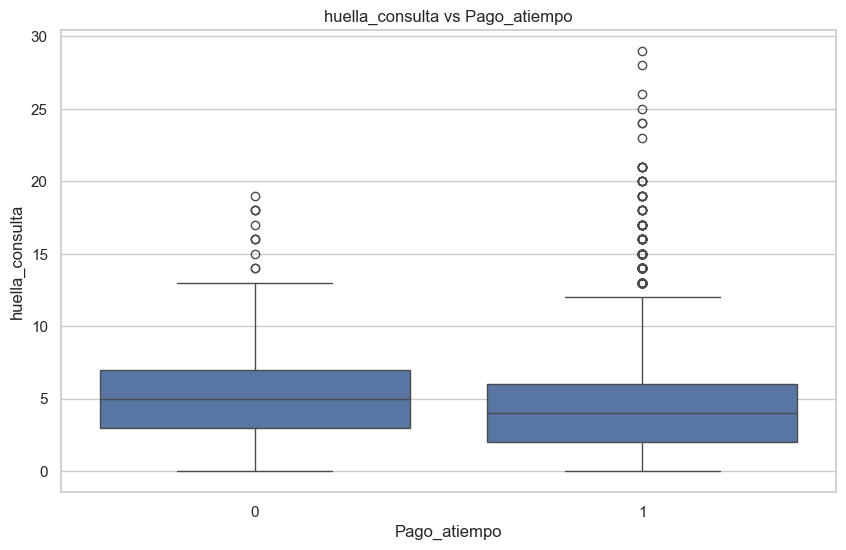

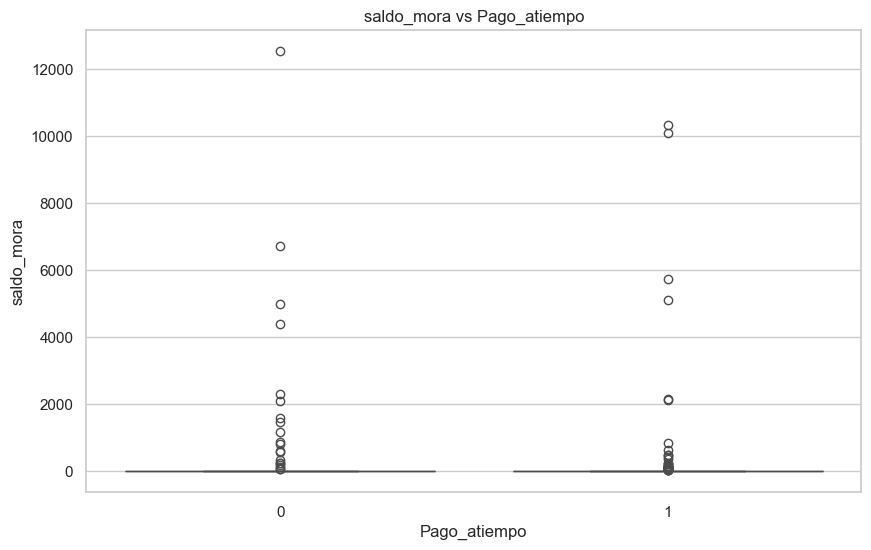

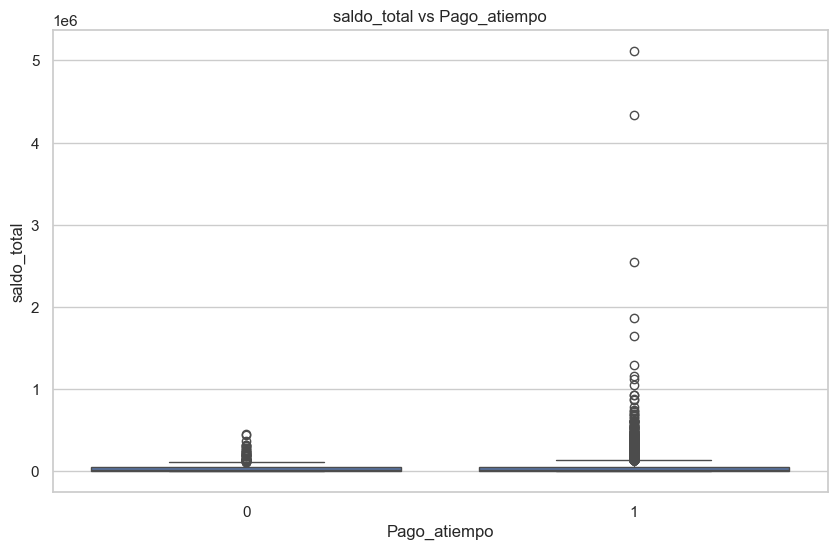

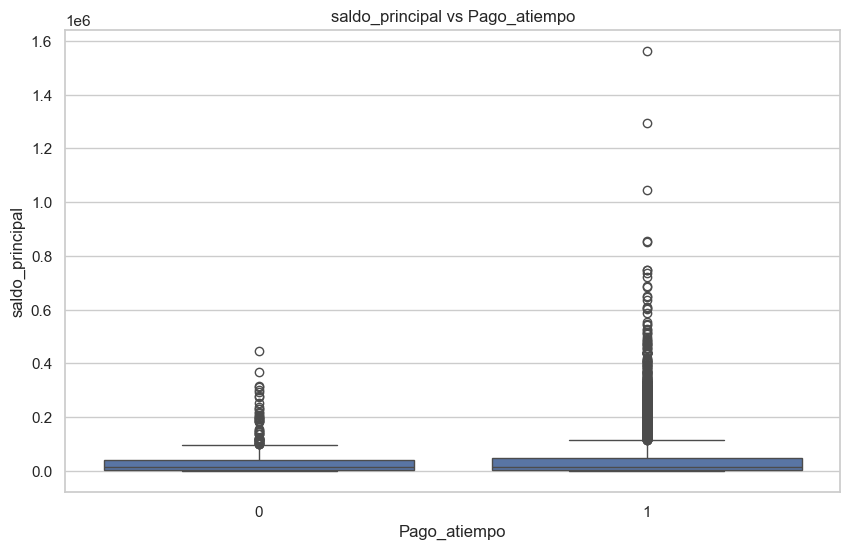

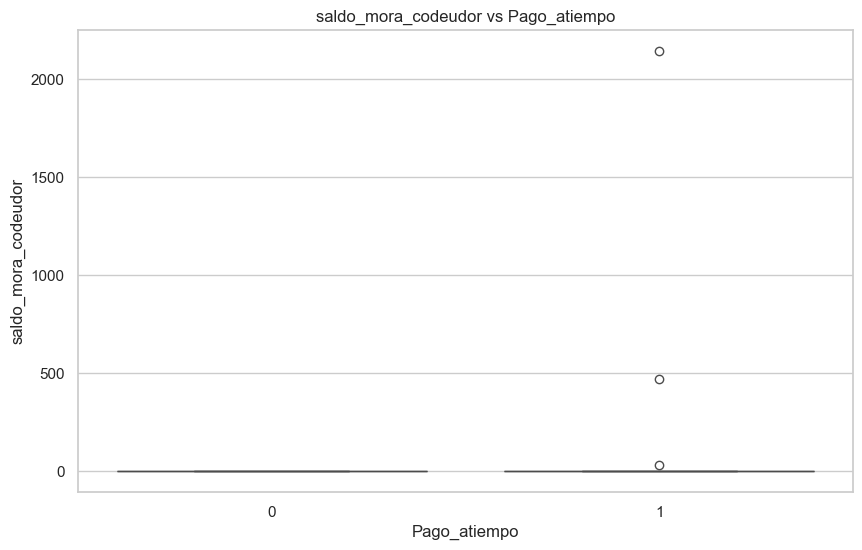

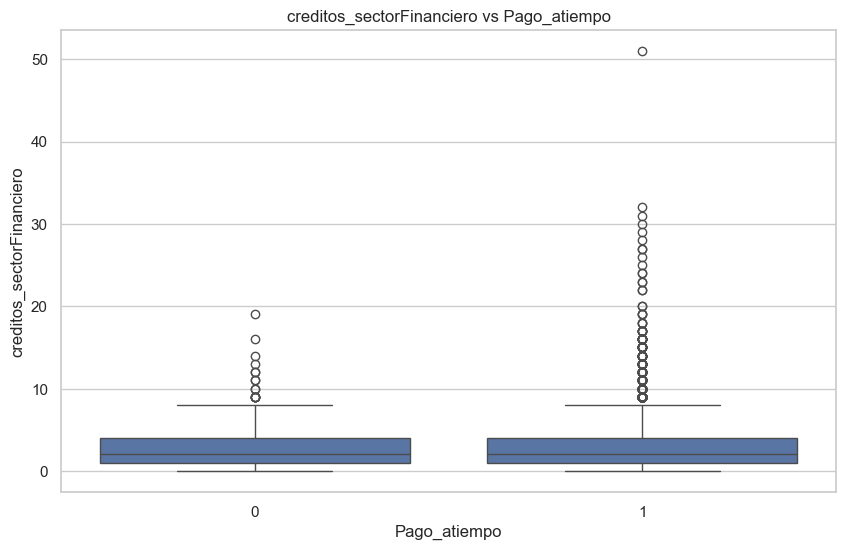

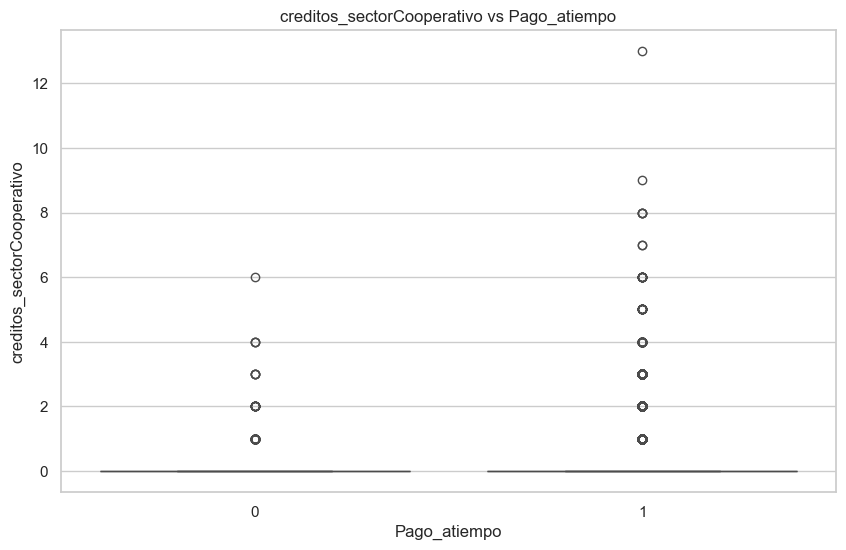

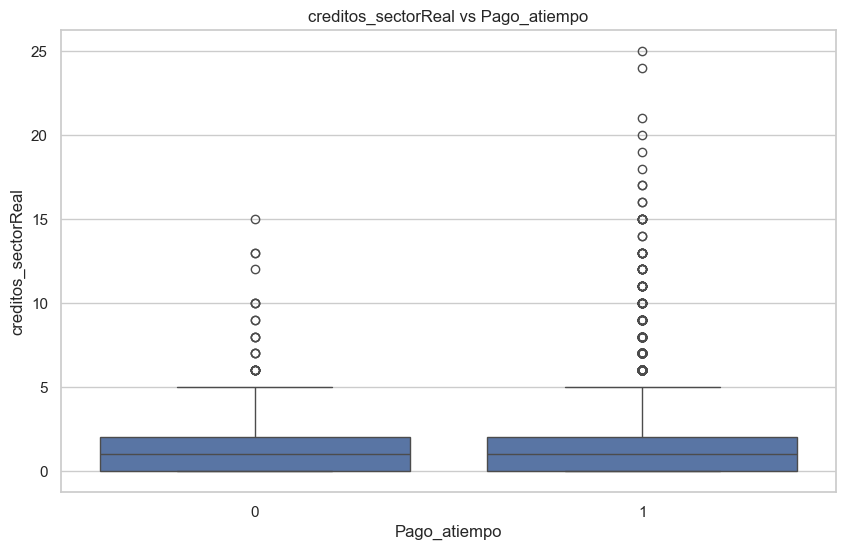

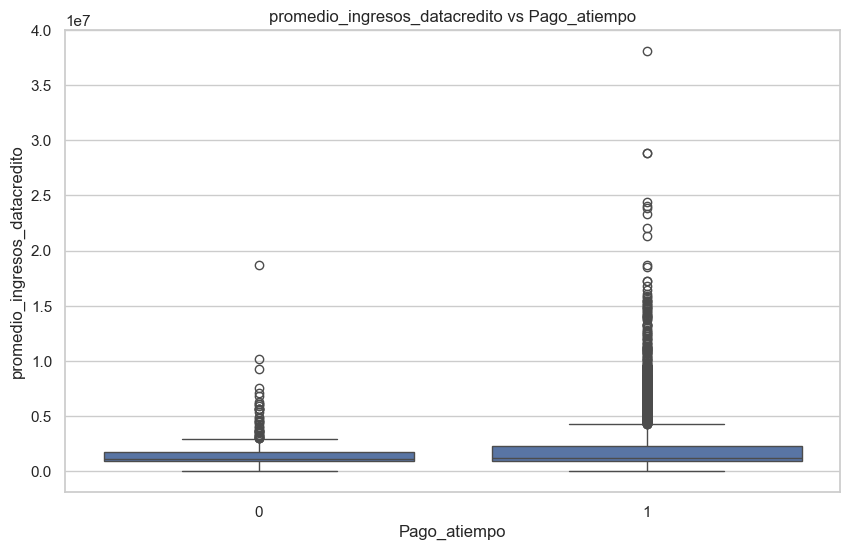

In [19]:
def analisis_bivariable_numerico(df: pd.DataFrame, columnas: list, target: str):
    for col in columnas:
        sns.boxplot(data=df, x=target, y=col)
        plt.title(f"{col} vs {target}")
        plt.show()

analisis_bivariable_numerico(df, numericas, "Pago_atiempo")
